<a href="https://colab.research.google.com/github/auramolina/Analitica-en-recursos-humanos/blob/main/Modelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='0C2054'><b>Librerías

In [1]:
#### Cargar paquetes
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, get_scorer_names, accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler ## escalar variables

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, classification_report

import joblib  ### para guardar modelos
import openpyxl
import sys
import os

In [2]:
## Conectar el drive
from google.colab import drive
drive.mount('/content/drive')

path='/content/drive/MyDrive/AA/Analitica-en-recursos-humanos'
os.chdir(path) ### setting a Working directory on drive path
sys.path.append(path+'/')  ###setting path to read user defined functions

Mounted at /content/drive


In [3]:
import funciones_jc as fn ### importar modulo de  funciones
from funciones_jc import * ### importar toddas llas funciones del archivo

## con esto ya ses pueden utilizar todas las funciones propias

In [4]:
d2015 = pd.read_csv('https://raw.githubusercontent.com/auramolina/Analitica-en-recursos-humanos/main/Datos/dummies2015')
d2015

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,0,1,131160,1.0,11,0,1.0,...,False,False,False,False,False,False,False,False,True,False
1,31,10,1,0,1,41890,0.0,23,1,6.0,...,False,False,False,False,True,False,False,False,False,True
2,32,17,4,1,4,193280,1.0,15,3,5.0,...,False,False,False,False,False,True,False,False,True,False
3,38,2,5,1,3,83210,3.0,11,3,13.0,...,False,False,False,False,False,False,False,False,True,False
4,32,10,1,1,1,23420,4.0,12,2,9.0,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,4,0,1,60290,3.0,17,1,10.0,...,False,False,False,False,True,False,False,False,False,True
4406,29,2,4,1,1,26790,2.0,15,0,10.0,...,True,False,False,False,False,False,False,True,False,False
4407,25,25,2,1,2,37020,0.0,20,0,5.0,...,False,False,False,False,False,True,False,False,True,False
4408,42,18,2,1,1,23980,0.0,14,1,10.0,...,True,False,False,False,False,False,False,True,False,False


#<font color='0C2054'><b> Separación variables

In [5]:
### Variable respuesta
y = d2015['Attrition']

## Variables explicativas
X1 = d2015.loc[:,~d2015.columns.isin(['Attrition'])]

## <font color='0C2054'>Estandarización

In [6]:
## Estandarización y escalado de los datos
scaler = StandardScaler()
scaler.fit(X1)
X2 = scaler.transform(X1)
X = pd.DataFrame(X2,columns=X1.columns)

In [7]:
X2

array([[ 1.54136892, -0.39393818, -0.89168825, ..., -0.53487311,
         1.08823234, -0.68556546],
       [-0.64866811,  0.09963874, -1.86842575, ..., -0.53487311,
        -0.91892141,  1.45864991],
       [-0.53916626,  0.96339837,  1.06178675, ..., -0.53487311,
         1.08823234, -0.68556546],
       ...,
       [-1.30567922,  1.95055222, -0.89168825, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 0.55585225,  1.0867926 , -0.89168825, ...,  1.86960232,
        -0.91892141, -0.68556546],
       [ 0.33684855,  2.32073492,  0.08504925, ...,  1.86960232,
        -0.91892141, -0.68556546]])

# <font color='0C2054'><b>Modelos Iniciales</font></b>

* Gradient boosting: es útil debido a su capacidad para manejar datos desbalanceados al enfocarse en los casos difíciles de predecir, como los empleados que renuncian.
* Bosques aleatorios: se selecciona RFC por su rendimiento, que generalmente es bueno, dando resultados satisfactorios, también porque es bueno en modelos que tienen muchas variables categóricas.

In [8]:
m_lr = LogisticRegression()
m_rf = RandomForestClassifier()
m_tr = DecisionTreeClassifier()
m_gbt = GradientBoostingClassifier()

In [9]:
modelos = list([m_lr, m_rf,m_gbt,m_tr])

## <font color='0C2054'>Selección de variables

Con el objetivo de identificar las características más relevantes que influyen en la rotación de empleados se utilizo SelectFromModel lo que hizo que se pasaran de 43 variables explicativas a 13

In [10]:
var_names = fn.sel_variables(modelos, X, y, threshold = "2*mean")
var_names.shape

(13,)

In [11]:
X2 = X[var_names] ### matriz con variables seleccionadas
X2.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               4410 non-null   float64
 1   BusinessTravel_Travel_Frequently  4410 non-null   float64
 2   DistanceFromHome                  4410 non-null   float64
 3   EnvironmentSatisfaction           4410 non-null   float64
 4   JobSatisfaction                   4410 non-null   float64
 5   MaritalStatus_Single              4410 non-null   float64
 6   MonthlyIncome                     4410 non-null   float64
 7   NumCompaniesWorked                4410 non-null   float64
 8   PercentSalaryHike                 4410 non-null   float64
 9   TotalWorkingYears                 4410 non-null   float64
 10  YearsAtCompany                    4410 non-null   float64
 11  YearsSinceLastPromotion           4410 non-null   float64
 12  YearsW

# <font color='0C2054'><b>Modelado



## <font color='0C2054'>Calculo F1-score

Si bien la comparacion del F1-score de todos los modelos no marca como mejores a el  Random Forest y Gradient Boosting se consideraran estos modelos, debido a su capacidad para manejar relaciones no lineales y capturar interacciones complejas. Incluso con un subconjunto de variables, ambos modelos mantienen un rendimiento robusto, lo que indica que pueden identificar las características más relevantes de manera autónoma, mejorando la eficiencia sin sacrificar precisión. En problemas de clasificación desbalanceada como la predicción de retiros, estos modelos, combinados con técnicas de balanceo, proporcionan predicciones confiables y ofrecen información valiosa sobre los factores clave para diseñar estrategias de retención.


In [64]:
# Calcular F1-score con 30 iteraciones para todos los modelos con todas las variables
f1score_df = fn.medir_modelos(modelos, "f1", X, y, 30)
# Calcular F1-score con 30 iteraciones para todos los modelos con variables seleccionadas
f1_score_varsel = fn.medir_modelos(modelos, "f1", X2, y, 30)
# visualizar los resultados de f1- score para los modelos con todas las variabels y con las variables seleccionadas
f1=pd.concat([f1score_df,f1_score_varsel],axis=1)
f1.columns=['rl', 'tr', 'rf', 'gb', 'rl_Sel', 'tr_sel', 'rf_sel', 'gb_Sel']
f1

,rl,tr,rf,gb,rl_Sel,tr_sel,rf_sel,gb_Sel
0,0.370370,0.975610,0.625000,0.975610,0.250000,0.975610,0.482759,0.975610
1,0.320000,1.000000,0.580645,1.000000,0.320000,1.000000,0.562500,1.000000
2,0.230769,1.000000,0.482759,0.975610,0.086957,1.000000,0.413793,0.975610
3,0.230769,1.000000,0.645161,1.000000,0.250000,1.000000,0.500000,1.000000
4,0.086957,1.000000,0.173913,1.000000,0.090909,1.000000,0.444444,1.000000
5,0.074074,1.000000,0.600000,1.000000,0.240000,1.000000,0.482759,1.000000
6,0.320000,1.000000,0.687500,1.000000,0.320000,1.000000,0.727273,1.000000
7,0.240000,1.000000,0.600000,1.000000,0.173913,1.000000,0.384615,1.000000
8,0.214286,0.800000,0.370370,0.551724,0.086957,0.645161,0.384615,0.551724
9,0.083333,0.090909,0.090909,0.000000,0.000000,0.384615,0.240000,0.000000


In [14]:
# promedio de la metrica F1-score para todos los modelos con todas las variables y con las variables seleccionadas
f1.mean()

,0
rl,0.212993
dt,0.850431
rf,0.467928
gb,0.790158
rl_Sel,0.190291
dt_sel,0.848571
rf_sel,0.445383
gb_Sel,0.790158


## <font color='0C2054'>Grilla de hiperparametros para el modelo Ramdon Forest

In [15]:
param_grid_rf = {
    'n_estimators': [5, 50, 100, 200, 500],  # Número de árboles en el bosque
    'max_features': [5, 20],  # Número de características a considerar en cada división
    'max_depth': [10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [5, 20, 100],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas para estar en un nodo hoja
    'bootstrap': [True, False]  # Método de muestreo para construir árboles
}

## <font color='0C2054'>Grilla de hiperparametros para el Decision Tree

In [39]:
# Grilla de hiperparametros para el modelo Decision Tree
param_grid_tr = {
    'criterion': ['gini', 'entropy'],  # Criterios para la división de nodos
    'max_depth': [5, 10, 15],     # Profundidad máxima del árbol
    'min_samples_split': [5, 20, 100 ],    # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],      # Número mínimo de muestras requeridas en un nodo hoja
    'max_features': [5, 20],  # Número máximo de características a considerar en cada división
    'class_weight': [None, 'balanced']  # Peso de las clases para abordar el desbalance de clases
}

## <font color='0C2054'>Grilla de hiperparámetros para Gradient Boosting

In [16]:
param_grid_gb = {
    'n_estimators': [100, 200, 500],  # Número de árboles en el ensemble
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Tasa de aprendizaje
    'max_depth': [3, 5, 8],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras necesarias en un nodo hoja
    'subsample': [0.8, 0.9, 1.0],  # Fracción de muestras utilizadas para entrenar cada árbol
    'max_features': ['auto', 'sqrt', 'log2']  # Número de características a considerar al hacer cada división
}

## <font color='0C2054'>Técnica de búsqueda de hiperparámetros para el modelo Ramdon Forest

In [17]:
tun_rf = RandomizedSearchCV(m_rf,param_distributions=param_grid_rf,n_iter=10,scoring="f1")
tun_rf.fit(X2,y)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30],
                                        'max_features': [5, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [5, 20, 100],
                                        'n_estimators': [5, 50, 100, 200, 500]},
                   scoring='f1')

In [18]:
# Imprimir los parametros de la grilla con el mejor puntaje
pd.set_option('display.max_colwidth', 100)
resultados=tun_rf.cv_results_
tun_rf.best_params_
pd_resultados=pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]].sort_values(by="mean_test_score", ascending=False)

,params,mean_test_score
3,"{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 5, 'max_dept...",0.856123
9,"{'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 5, 'max_dep...",0.801521
5,"{'n_estimators': 5, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 20, 'max_dept...",0.753297
1,"{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 5, 'max_dep...",0.726976
2,"{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 20, 'max_de...",0.706295
4,"{'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 5, 'max_de...",0.671498
7,"{'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 20, 'max_de...",0.662958
0,"{'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 20, 'max_de...",0.650360
8,"{'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 5, 'max_de...",0.518643
6,"{'n_estimators': 5, 'min_samples_split': 100, 'min_samples_leaf': 4, 'max_features': 5, 'max_dep...",0.255512


## <font color='0C2054'>Técnica de búsqueda de hiperparámetros para el modelo Decision Tree

In [42]:
# Crear la instancia de GridSearchCV para búsqueda de hiperparámetros
tun_tr = GridSearchCV(m_tr, param_grid=param_grid_tr, scoring='f1', cv=5)
# Realizar la búsqueda de hiperparámetros en los datos
tun_tr.fit(X2, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15], 'max_features': [5, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 20, 100]},
             scoring='f1')

In [43]:
# Imprimir los parametros de la grilla con el mejor puntaje
pd.set_option('display.max_colwidth', 100)
resultados=tun_tr.cv_results_
tun_tr.best_params_
pd_resultados=pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]].sort_values(by="mean_test_score", ascending=False)


,params,mean_test_score
153,"{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 20, 'min_samp...",0.911365
156,"{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 20, 'min_samp...",0.909989
144,"{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 5, 'min_sampl...",0.889461
147,"{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 5, 'min_sampl...",0.877189
210,"{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'max_features': 20, 'min_s...",0.875163
...,...,...
59,"{'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'min_samples_l...",0.279982
2,"{'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'min_samples_leaf...",0.278044
58,"{'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'min_samples_l...",0.273269
56,"{'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'min_samples_l...",0.268346


## <font color='0C2054'>Técnica de búsqueda de hiperparámetros para el GradientBoostingClassifier

In [19]:
#GRADIENT BOOSTING

from sklearn.ensemble import GradientBoostingClassifier

gboos = GradientBoostingClassifier(n_estimators = 100, random_state = 28)

gboos.fit(X2,y)

GradientBoostingClassifier(random_state=28)

In [20]:
tun_gbt = RandomizedSearchCV(m_gbt,param_distributions=param_grid_gb,n_iter=10,scoring="f1")
tun_gbt.fit(X2,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='f1')

In [21]:
# Imprimir los parametros de la grilla con el mejor puntaje
pd.set_option('display.max_colwidth', 100)
resultados=tun_gbt.cv_results_
tun_gbt.best_params_
pd_resultados=pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]].sort_values(by="mean_test_score", ascending=False)

,params,mean_test_score
6,"{'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_feat...",0.905081
7,"{'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_fea...",0.903811
2,"{'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_feat...",0.897224
8,"{'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_feat...",0.853227
3,"{'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_feat...",0.760943
5,"{'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_feat...",0.582825
4,"{'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_feat...",0.434911
9,"{'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_fea...",0.313468
0,"{'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_fea...",NaN
1,"{'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_fea...",NaN


In [44]:
# Mejor grilla del modelo GradientBoostingClassifier
gb_final = tun_gbt.best_estimator_

# Guardar el modelo con hyperparameter tunning
rf_final = tun_rf.best_estimator_

# Mejor grilla del modelo Decision Tree
tr_final = tun_tr.best_estimator_



# <font color='0C2054'><b>Analisis del los modelos

In [45]:
#####Evaluar métrica de entrenamiento y evaluación para mirar sobre ajuste ####
eval_gb=cross_validate(gb_final,X2,y,cv=30,scoring="f1",return_train_score=True)
eval_rf=cross_validate(rf_final,X2,y,cv=30,scoring="f1",return_train_score=True)
eval_tr=cross_validate(tr_final,X2,y,cv=30,scoring="f1",return_train_score=True)



In [46]:
# ### convertir resultado de evaluacion entrenamiento y evaluacion en data frame
# para Ramdon Forest
train_rf=pd.DataFrame(eval_rf['train_score'])
test_rf=pd.DataFrame(eval_rf['test_score'])
train_test_rf=pd.concat([train_rf, test_rf],axis=1)
train_test_rf.columns=['train_score','test_score']
train_test_rf

,train_score,test_score
0,0.949387,0.975610
1,0.950192,1.000000
2,0.950268,0.975610
3,0.946718,1.000000
4,0.950420,1.000000
5,0.952816,1.000000
6,0.949387,1.000000
7,0.949618,0.975610
8,0.947697,0.687500
9,0.949606,0.090909


In [47]:
#### convertir resultado de evaluacion entrenamiento y evaluacion en data frame para Ramdon Forest
train_gb=pd.DataFrame(eval_gb['train_score'])
test_gb=pd.DataFrame(eval_gb['test_score'])
train_test_gb=pd.concat([train_gb, test_gb],axis=1)
train_test_gb.columns=['train_score','test_score']
train_test_gb

,train_score,test_score
0,0.953612,0.975610
1,0.953612,1.000000
2,0.953753,1.000000
3,0.953683,1.000000
4,0.953683,1.000000
5,0.952816,1.000000
6,0.953683,1.000000
7,0.953683,1.000000
8,0.953185,0.764706
9,0.953917,0.727273


In [48]:
train_tr=pd.DataFrame(eval_tr['train_score'])
test_tr=pd.DataFrame(eval_tr['test_score'])
train_test_tr=pd.concat([train_tr, test_tr],axis=1)
train_test_tr.columns=['train_score','test_score']
train_test_tr

,train_score,test_score
0,0.893466,0.851064
1,0.899135,0.930233
2,0.915328,0.888889
3,0.925461,0.976744
4,0.906994,0.893617
5,0.910675,0.875000
6,0.910275,0.913043
7,0.891258,0.875000
8,0.906318,0.913043
9,0.929786,0.954545


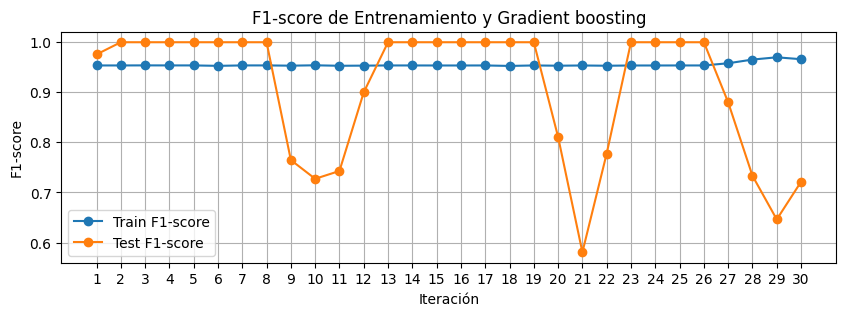

In [49]:
# Número de iteraciones
iterations = range(1, len(train_test_gb) + 1)

# Crear el gráfico de líneas para ver si hay o no sobreajuste
plt.figure(figsize=(10, 3))
plt.plot(iterations, train_test_gb['train_score'], marker='o', label='Train F1-score')
plt.plot(iterations, train_test_gb['test_score'], marker='o', label='Test F1-score')
plt.title('F1-score de Entrenamiento y Gradient boosting')
plt.xlabel('Iteración')
plt.ylabel('F1-score')
plt.xticks(iterations)
plt.legend()
plt.grid(True)
plt.show()

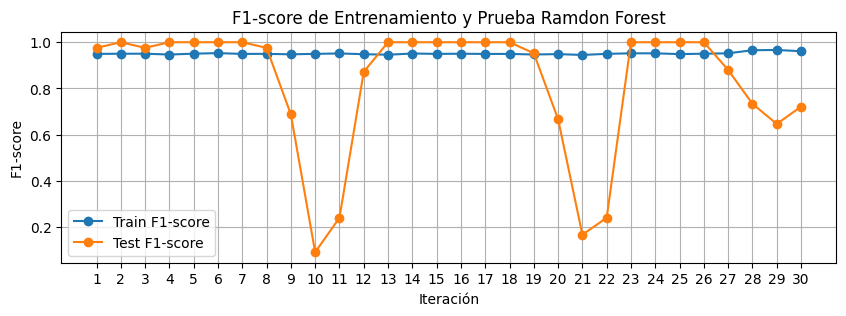

In [50]:
# Número de iteraciones
iterations = range(1, len(train_test_rf) + 1)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 3))
plt.plot(iterations, train_test_rf['train_score'], marker='o', label='Train F1-score')
plt.plot(iterations, train_test_rf['test_score'], marker='o', label='Test F1-score')
plt.title('F1-score de Entrenamiento y Prueba Ramdon Forest')
plt.xlabel('Iteración')
plt.ylabel('F1-score')
plt.xticks(iterations)
plt.legend()
plt.grid(True)
plt.show()

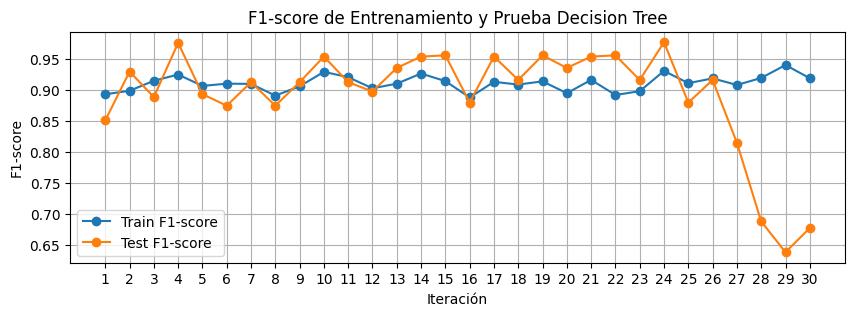

In [51]:
# Número de iteraciones
iterations = range(1, len(train_test_tr) + 1)

# Crear el gráfico de líneas para ver si hay o no sobreajuste
plt.figure(figsize=(10, 3))
plt.plot(iterations, train_test_tr['train_score'], marker='o', label='Train F1-score')
plt.plot(iterations, train_test_tr['test_score'], marker='o', label='Test F1-score')
plt.title('F1-score de Entrenamiento y Prueba Decision Tree')
plt.xlabel('Iteración')
plt.ylabel('F1-score')
plt.xticks(iterations)
plt.legend()
plt.grid(True)
plt.show()

In [53]:
train_test_gb["test_score"].mean()

0.9086825971118767

In [54]:
train_test_rf["test_score"].mean()

0.8274515390535983

In [55]:
train_test_tr["test_score"].mean()

0.893080679754528

In [30]:
# separar datos de train y test
x_train,x_test,y_train,y_test = train_test_split(X2,y,shuffle = True,test_size=0.30, random_state=123)

In [31]:
y_pred_train_gb = gb_final.predict(x_train) # guardar la predicción para train
y_pred_test_gb = gb_final.predict(x_test) # guardar la predicción para

[[1122   25]
 [   1  175]]


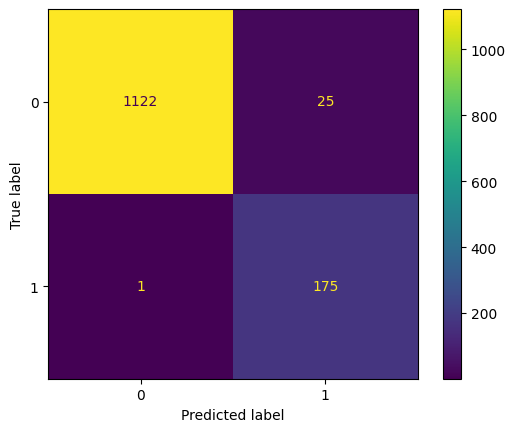

In [32]:
# Matriz de confusión:
cm = confusion_matrix(y_test, y_pred_test_gb, labels=gb_final.classes_) # guardar las clases para la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gb_final.classes_)
disp.plot();
print(cm)

In [58]:
y_pred_train_tr = tr_final.predict(x_train)
y_pred_test_tr = tr_final.predict(x_test)

[[1101   46]
 [   1  175]]


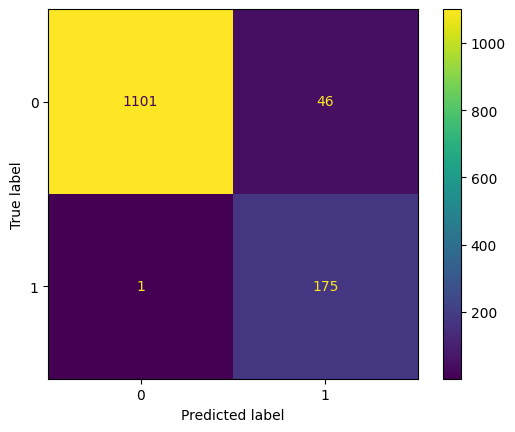

In [59]:
# Matriz de confusión:
cm = confusion_matrix(y_test, y_pred_test_tr, labels=tr_final.classes_) # guardar las clases para la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tr_final.classes_)
disp.plot();
print(cm)

In [33]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f"Accuracy test: {accuracy_score(y_test, y_pred_test_gb)}")
print(f'Precicion: {TP/(TP+FP)}')
print(f'Recuperacion (Sensibilidad)): {TP/(TP+FN)}')
print(f'F1-score:', f1_score(y_test, y_pred_test_gb, average='binary'))
print(f'Especificidad: {TN/(FP+TN)}')

Accuracy test: 0.9803476946334089
Precicion: 0.9991095280498664
Recuperacion (Sensibilidad)): 0.978204010462075
F1-score: 0.9308510638297873
Especificidad: 0.9943181818181818


In [60]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f"Accuracy test: {accuracy_score(y_test, y_pred_test_tr)}")
print(f'Precicion: {TP/(TP+FP)}')
print(f'Recuperacion (Sensibilidad)): {TP/(TP+FN)}')
print(f'F1-score:', f1_score(y_test, y_pred_test_tr, average='binary'))
print(f'Especificidad: {TN/(FP+TN)}')

Accuracy test: 0.9644746787603931
Precicion: 0.9990925589836661
Recuperacion (Sensibilidad)): 0.959895379250218
F1-score: 0.8816120906801007
Especificidad: 0.9943181818181818


In [61]:
# Asegúrate de que las columnas del DataFrame coincidan con las del entrenamiento
entrenamiento_columnas = gb_final.feature_names_in_

# Asegurarte de que las columnas de X2 coincidan con las del entrenamiento
for col in entrenamiento_columnas:
    if col not in X2.columns:
        X2[col] = 0  # Agregar la columna faltante con valor 0

# Ordenar las columnas para que coincidan con las del entrenamiento
X2 = X2[entrenamiento_columnas]

##### Mirar importancia de variables para tomar acciones ###
pd.set_option('display.max_rows', 100)

# Obtener la importancia de las variables
importancia1 = pd.DataFrame(entrenamiento_columnas, columns=["variable"])
importancia2 = pd.DataFrame(gb_final.feature_importances_, columns=["peso"])

# Combinar los DataFrames para mostrar la importancia de las variables
importancia = pd.concat([importancia1, importancia2], axis=1)
importancia = importancia.sort_values(by=["peso"], ascending=False)

# Exportar la importancia de las variables a un archivo Excel
importancia.to_excel("/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/variables_importances.xlsx")

# Hacer una predicción para el índice 0 en X2
prediccion = gb_final.predict(X2[X2.index == 0])
print(prediccion)

[0]


In [62]:
##### Mirar importancia de variables para tomar acciones ###
pd.set_option('display.max_rows', 100)
importancia1=pd.DataFrame(gb_final.feature_names_in_)
importancia2=pd.DataFrame(gb_final.feature_importances_)
importancia=pd.concat([importancia1,importancia2],axis=1)
importancia.columns=["variable","peso"]
importancia.sort_values('peso')

importancia.sort_values(by=["peso"], ascending=False)
importancia.to_excel("/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/variables_importances.xlsx")
gb_final.predict(X2[X2.index==0])

array([0])

In [65]:
### función para exportar y guardar objetos de python (cualquiera)
# joblib.dump(rf_final, "/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/rf_final.pkl") ## modelo ramdon forest
joblib.dump(gb_final, "/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/gb_final.pkl")
joblib.dump(tr_final, "/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/tr_final.pkl") ## modelo gradient boosting
joblib.dump(var_names, "/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/var_names.pkl")  ### para variables con que se entrena modelo
joblib.dump(scaler, "/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/scaler.pkl") ##


['/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/scaler.pkl']